In [11]:
import pandas as pd

inmuebles = pd.read_csv('../data/inmuebles_bogota.csv')
inmuebles.head()

,Tipo,Descripcion,Habitaciones,Baños,Área,Barrio,UPZ,Valor
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000
1,Casa,Casa en venta en Castilla,4,3,170,Castilla,KENNEDY: Castilla + Bavaria,$ 670.000.000
2,Apartamento,Apartamento en venta en Chico Reservado,3,3,144,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 1.120.000.000
3,Apartamento,Apartamento en venta en Usaquén,3,2,154,Usaquén,Usaquén,$ 890.000.000
4,Apartamento,Apartamento en venta en Bella Suiza,2,3,128,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,$ 970.000.000


In [2]:
columnas = {'Baños': 'Banos', 'Área': 'Area'}
inmuebles = inmuebles.rename(columns=columnas)
inmuebles.sample(10)

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor
5875,Apartamento,Apartamento en venta en Bosa,2,1,47,Bosa,Bosa Central,$ 119.000.000
772,Apartamento,Apartamento en venta en Nueva Zelandia,2,2,53,Nueva Zelandia,SUBA: La Academia + Guaymaral + San José de Ba...,$ 260.000.000
6962,Casa,Casa en venta en Suba,8,6,326,Suba,Suba,$ 1.300.000.000
7493,Casa,Casa en venta en Fontibón,2,1,118,Fontibón,Fontibón,$ 130.000.000
6278,Apartamento,Apartamento en venta en Zona Noroccidental,2,3,66,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000
1270,Apartamento,Apartamento en venta en Normandia,3,2,77,Normandia,ENGATIVÁ: Santa Cecilia + Jardín Botánico,$ 340.000.000
3937,Apartamento,Apartamento en venta en Usaquén,3,3,164,Usaquén,Usaquén,$ 850.000.000
4284,Apartamento,Apartamento en venta en Bosa,2,1,45,Bosa,Bosa Central,$ 116.000.000
6318,Apartamento,Apartamento en venta en Portales Del Norte,3,2,86,Portales Del Norte,Britalia,$ 404.000.000
3925,Apartamento,Apartamento en venta en Usaquén,2,2,60,Usaquén,Usaquén,$ 422.000.000


In [3]:
inmuebles_chico = (inmuebles.Barrio == 'Chico Reservado')
chico_reservado = inmuebles[inmuebles_chico]
chico_reservado.head()

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor
2,Apartamento,Apartamento en venta en Chico Reservado,3,3,144,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 1.120.000.000
39,Apartamento,Apartamento en venta en Chico Reservado,1,1,64,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 495.000.000
72,Apartamento,Apartamento en venta en Chico Reservado,1,1,64,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 495.000.000
126,Apartamento,Apartamento en venta en Chico Reservado,3,4,150,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 1.300.000.000
143,Apartamento,Apartamento en venta en Chico Reservado,2,4,104,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 1.100.000.000


In [4]:
chico_reservado.Area.mean()

142.78666666666666

In [5]:
inmuebles.Barrio.value_counts()

Usaquén               1105
Zona Noroccidental     877
Bosa                   589
Kennedy                589
Cedritos               554
                      ... 
Colinas De Suba          1
La Estanzuela            1
Roma                     1
Alameda                  1
Prado Veraniego          1
Name: Barrio, Length: 149, dtype: int64

In [6]:
inmuebles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Tipo          9520 non-null   object
 1   Descripcion   9520 non-null   object
 2   Habitaciones  9520 non-null   int64 
 3   Banos         9520 non-null   int64 
 4   Area          9520 non-null   int64 
 5   Barrio        9520 non-null   object
 6   UPZ           9478 non-null   object
 7   Valor         9520 non-null   object
dtypes: int64(3), object(5)
memory usage: 595.1+ KB


<Axes: >

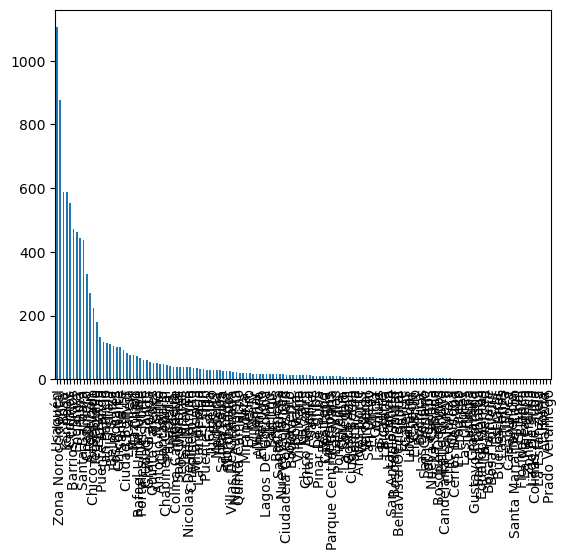

In [8]:
inmuebles_barrio = inmuebles.Barrio.value_counts()
inmuebles_barrio.plot(kind='bar')

<Axes: xlabel='Barrio'>

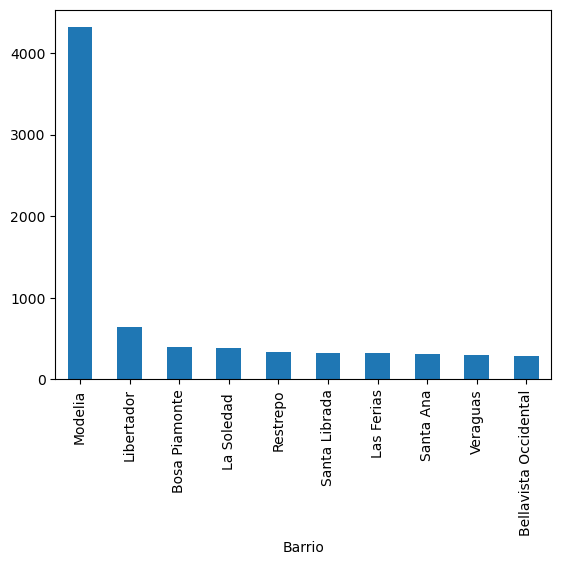

In [9]:
# Promedio de área de todos los inmuebles en los barrios en el dataset, el top 10
mean_houses_area = inmuebles.groupby('Barrio').Area.mean().sort_values(ascending=False).head(10)
mean_houses_area.plot(kind='bar')

In [10]:
# Calcular otros datos estadísticos de interés, como conteo, mediana, valores  minimo y máximo
inmuebles.groupby('Barrio').Area.agg(['count', 'mean', 'median', 'min', 'max']).sort_values(by='count', ascending=False).head(10)

,count,mean,median,min,max
Barrio,,,,,
Usaquén,1105,134.046154,93.0,24,6364
Zona Noroccidental,877,135.785633,78.0,16,5458
Kennedy,589,104.371817,60.0,28,970
Bosa,589,59.217317,47.0,31,1100
Cedritos,554,96.951264,87.0,27,516
Barrios Unidos,473,185.621564,87.0,28,8884
Engativa,462,129.454545,71.0,21,4600
Suba,443,139.085779,88.0,34,1996
Santa Barbara,438,124.869863,89.0,30,1080
